In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
#Aussortieren von leeren Cholesterin Beobachtungen
heartData = heartData[heartData["Cholesterol"]!=0]

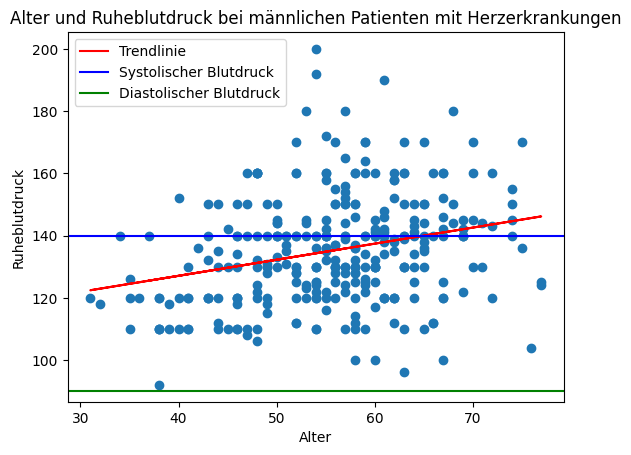

In [3]:
unhealthyData = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M")]

plt.title("Alter und Ruheblutdruck bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["Age"], unhealthyData["RestingBP"])
m, b = np.polyfit(unhealthyData["Age"], unhealthyData["RestingBP"], 1)
plt.plot(unhealthyData["Age"], m*unhealthyData["Age"] + b, color='red', label='Trendlinie')
plt.axhline(y=140, color='blue', linestyle='-', label='Systolischer Blutdruck')
plt.axhline(y=90, color='green', linestyle='-', label='Diastolischer Blutdruck')
plt.xlabel("Alter")
plt.ylabel("Ruheblutdruck")
plt.legend()
plt.savefig("Alter und Ruheblutdruck bei männlichen Patienten mit Herzerkrankungen.png")
plt.show()

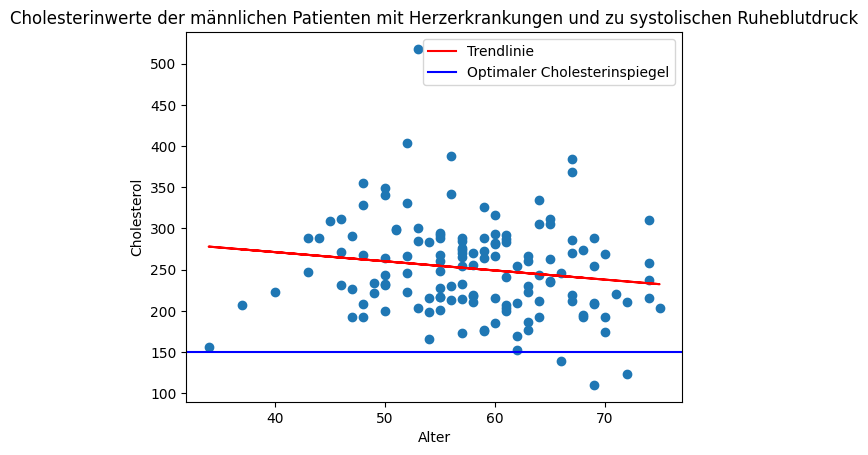

Durchschnittlicher Cholesterinwert: 251.05797101449275
Anzahl der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck: 138


In [4]:
systolic = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M") & (heartData["RestingBP"] >= 140)]

plt.title("Cholesterinwerte der männlichen Patienten mit Herzerkrankungen und zu systolischen Ruheblutdruck")
plt.scatter(systolic["Age"], systolic["Cholesterol"])
m, b = np.polyfit(systolic["Age"], systolic["Cholesterol"], 1)
plt.plot(systolic["Age"], m*systolic["Age"] + b, color='red', label='Trendlinie')
plt.axhline(y=150, color='blue', linestyle='-', label='Optimaler Cholesterinspiegel')
plt.xlabel("Alter")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

print("Durchschnittlicher Cholesterinwert: "+str(systolic["Cholesterol"].mean()))
print("Anzahl der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck: " + str(len(systolic)))

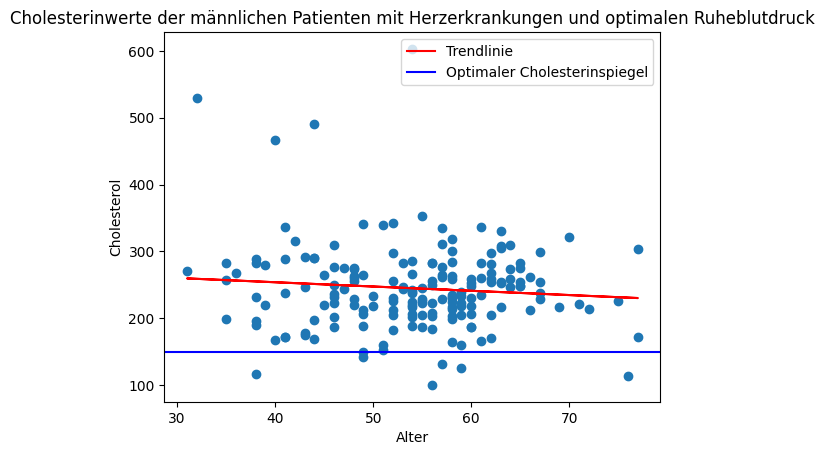

Durchschnittlicher Cholesterinwert: 244.74719101123594
Anzahl der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck: 178


In [5]:
optimalRestingBP = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M") & (heartData["RestingBP"] < 140) & (heartData["RestingBP"] > 90)]

plt.title("Cholesterinwerte der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck")
plt.scatter(optimalRestingBP["Age"], optimalRestingBP["Cholesterol"])
m, b = np.polyfit(optimalRestingBP["Age"], optimalRestingBP["Cholesterol"], 1)
plt.plot(optimalRestingBP["Age"], m*optimalRestingBP["Age"] + b, color='red', label='Trendlinie')
plt.axhline(y=150, color='blue', linestyle='-', label='Optimaler Cholesterinspiegel')
plt.xlabel("Alter")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()
print("Durchschnittlicher Cholesterinwert: "+str(optimalRestingBP["Cholesterol"].mean()))
print("Anzahl der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck: " + str(len(optimalRestingBP)))

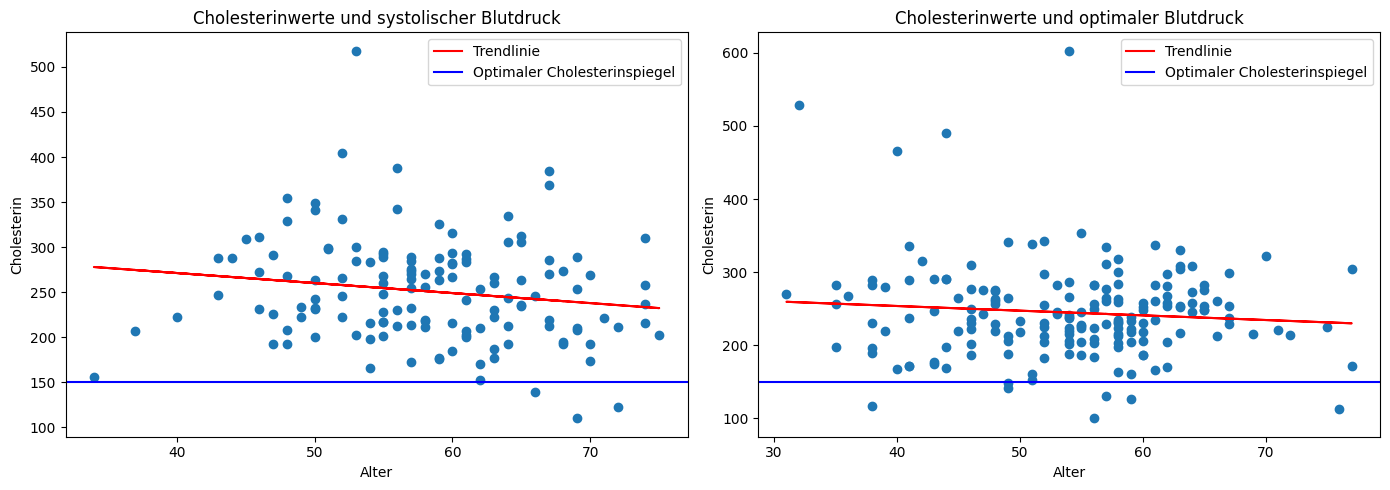

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Daten für die Plots
systolic = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M") & (heartData["RestingBP"] >= 140)]
optimalRestingBP = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M") & (heartData["RestingBP"] < 140) & (heartData["RestingBP"] > 90)]

# Subplots erstellen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Patienten mit zu hohem Ruheblutdruck
ax1.set_title("Cholesterinwerte und systolischer Blutdruck")
ax1.scatter(systolic["Age"], systolic["Cholesterol"])
m, b = np.polyfit(systolic["Age"], systolic["Cholesterol"], 1)
ax1.plot(systolic["Age"], m*systolic["Age"] + b, color='red', label='Trendlinie')
ax1.axhline(y=150, color='blue', linestyle='-', label='Optimaler Cholesterinspiegel')
ax1.set_xlabel("Alter")
ax1.set_ylabel("Cholesterin")
ax1.legend()

# Plot 2: Patienten mit optimalem Ruheblutdruck
ax2.set_title("Cholesterinwerte und optimaler Blutdruck")
ax2.scatter(optimalRestingBP["Age"], optimalRestingBP["Cholesterol"])
m, b = np.polyfit(optimalRestingBP["Age"], optimalRestingBP["Cholesterol"], 1)
ax2.plot(optimalRestingBP["Age"], m*optimalRestingBP["Age"] + b, color='red', label='Trendlinie')
ax2.axhline(y=150, color='blue', linestyle='-', label='Optimaler Cholesterinspiegel')
ax2.set_xlabel("Alter")
ax2.set_ylabel("Cholesterin")
ax2.legend()

# Layout anpassen
plt.tight_layout()

#
plt.savefig("Vergleich systolischer und optimaler Blutdruck.png")

# Plots anzeigen
plt.show()


## Zusammenhang Cholesterin und Blutdruck
Patienten mit zu hohen und "optimalen" Blutdruck haben beide einen zu hohen Cholesterinspiegel. Es ist nicht möglich nur durch Cholesterinwert zu schließen, ob der Patient einen zu hohen Bluthochdruck hat. Auch Menschen mit "gesunden" Cholesterinspiegel können Herzkreislauf erkrankt sein.

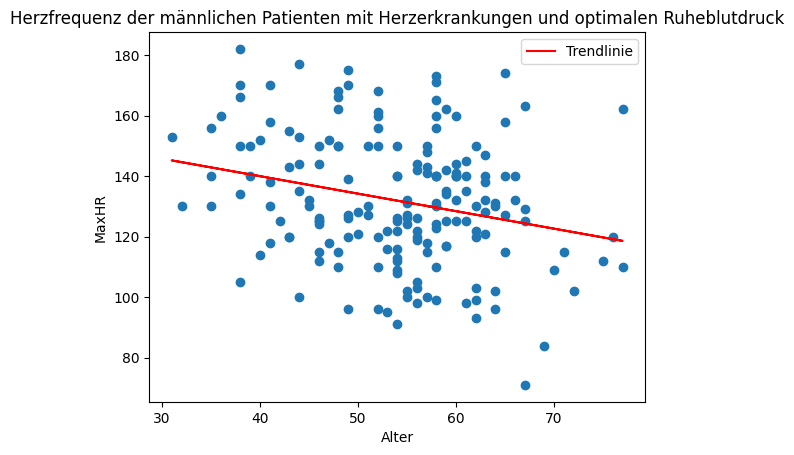

Durchschnittliche Herzfrequenz: 131.86516853932585


In [7]:
plt.title("Herzfrequenz der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck")
plt.scatter(optimalRestingBP["Age"], optimalRestingBP["MaxHR"])
m, b = np.polyfit(optimalRestingBP["Age"], optimalRestingBP["MaxHR"], 1)
plt.plot(optimalRestingBP["Age"], m*optimalRestingBP["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Alter")
plt.ylabel("MaxHR")
plt.legend()
plt.show()

print("Durchschnittliche Herzfrequenz: "+str(optimalRestingBP["MaxHR"].mean()))

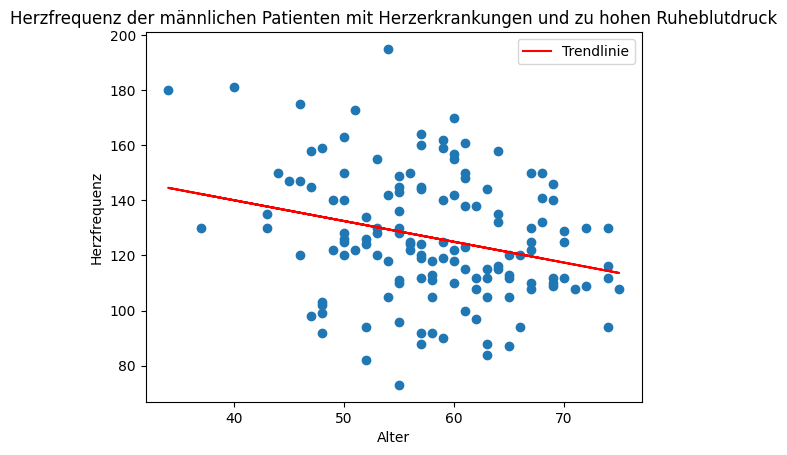

Durchschnittliche Herzfrequenz: 126.33333333333333


In [8]:
plt.title("Herzfrequenz der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck")
plt.scatter(systolic["Age"], systolic["MaxHR"])
m, b = np.polyfit(systolic["Age"], systolic["MaxHR"], 1)
plt.plot(systolic["Age"], m*systolic["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Alter")
plt.ylabel("Herzfrequenz")
plt.legend()
plt.show()

print("Durchschnittliche Herzfrequenz: "+str(systolic["MaxHR"].mean()))

## Zusammenhang Herfrequenz und Bluthochdruck
Auch hier ist es nicht möglich nur durch die Herfrequenz zu schließen, ob der Patient einen zu hohen Bluthochdruck hat.